<a href="https://colab.research.google.com/github/mlfa19/assignments/blob/master/Module%201/02/Assignment_02_Companion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 02 Companion Notebook

This notebook contains some exercises to walk you through implementing the linear regression algorithm.  We'll pay special attention to debugging and visualization as we go along.

## A Toy Linear Regression Problem Revisited

As we discovered in the last assignment, the idea of a toy problem is very useful for validating that a machine learning algorithm is working as it is intended to.  Recall the following basic setup and role for a toy problem:

> Suppose you are given a learning algorithm designed to estimate some model parameters $\textbf{w}$ from some training data.
>
> 1.  Generate values for the model parameters $\mathbf{w}$ (e.g., set them to some known values or generate them randomly).  If you were applying your algorithm to real data, you would of course not know these parameters, but instead estimate them from data.  For our toy problem we'll proceed with values that we generate so we can test our algorithm more easily.
>
> 2.  Generate some training input data, $\mathbf{X}$, (random numbers work well for this).  Generate the training output data, $\mathbf{y}$, by applying the model with parameters $\mathbf{w}$.  For example, in a linear regression problem since $\mathbf{w}$ represents the regression coefficients, then we can generate each training label, $y_i$ as $y_i = \mathbf{x_i}^\top \mathbf{w}$.
>
> 3.  Run your learning algorithm on the synthesized training data $\mathbf{X}, \mathbf{y}$ to arrive at estimated values of the model parameters, $\hat{\mathbf{w}}$.
>
> 4.  Compare $\mathbf{w}$ and $\hat{\mathbf{w}}$ as a way of understanding whether your learning algorithm is working.

In the next code block, you'll see an example of a toy regression problem where we set $\mathbf{w} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$ and generate some training data.  To make the data a little more interesting, we'll add some noise to the training outputs (you saw this in the last assignment).  We'll also visualize the training data.

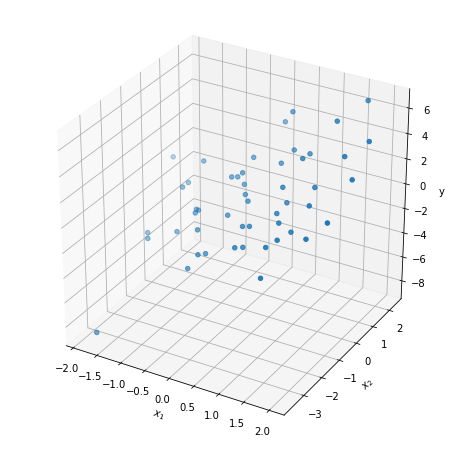

In [0]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
import matplotlib.pyplot as plt

n_points = 50
X = np.random.randn(n_points,2)
w_true = np.array([1, 2])
# we'll apply a Gaussian noise with a standard deviation of 0.5 to the outputs to make it more interesting
y = X.dot(w_true) + np.random.randn(n_points,)*0.5

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], y)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('y')

plt.show()

### *Notebook Exercise 1*

Before implementing the algorithm you derived for computing $\mathbf{w}^\star$, let's create a visualization of the sum of squared errors as a function of the entries of $\mathbf{w}$. You should recall from exercises in the assignment document that the sum of squared errors for a particular value of $\mathbf{w}$ can be written as $\left(\mathbf{X}\mathbf{w} - \mathbf{y} \right)^\top \left (\mathbf{X}\mathbf{w} - \mathbf{y} \right)$

(a) Write a function called `sum_of_squared_errors` that takes the parameters `X`, `y`, and `w` and returns the sum of squared errors that this particular value of `w` incurs on the training data `X`, `y`.  We have included a skeletal outline of the function along with a unit test (SoftDes flashback!!).

(b) Run the visualization code in the cell below and interpret the resulting output.  What do the contour lines represent in the generated plot?  Based on the visualization, where is the optimal value of `w` (the one that minizes the squared error)?  Does this agree with the setup of the toy problem?  If not, why doesn't it match?

In [0]:
def sum_of_squared_errors(X, y, w):
    """
    Return the sum of squared errors for the given training data (X, y) and
    model parameters w.

    >>> sum_of_squared_errors(np.array([[1, 4, 3],\
                                        [2, -1, 4]]),\
                              np.array([3, 4]),\
                              np.array([1, 2, 3]))
    289
    """
    # your code here
    pass

import doctest
doctest.testmod()

**********************************************************************
File "__main__", line 6, in __main__.sum_of_squared_errors
Failed example:
    sum_of_squared_errors(np.array([[1, 4, 3],                                        [2, -1, 4]]),                              np.array([3, 4]),                              np.array([1, 2, 3]))
Expected:
    289
Got nothing
**********************************************************************
1 items had failures:
   1 of   1 in __main__.sum_of_squared_errors
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=1)

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1203: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1205: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1239: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1239: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/usr/lo

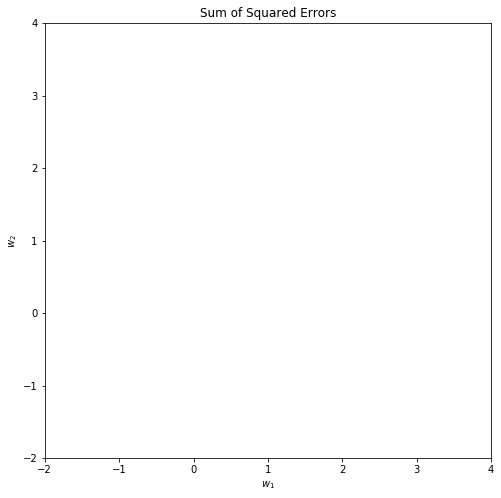

In [0]:
w1 = np.linspace(-2, 4, 50)
w2 = np.linspace(-2, 4, 50)

W1, W2 = np.meshgrid(w1, w2)
E = np.array([[sum_of_squared_errors(X, y, np.array([W1[i, j], W2[i, j]])) \
               for j in range(W1.shape[1])] \
              for i in range(W1.shape[0])])
fig, ax = plt.subplots(figsize=(8,8))
CS = ax.contour(W1, W2, E, colors='black', levels=20)
ax.clabel(CS, inline=1, fontsize=10)
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.title('Sum of Squared Errors')
plt.show()

#### *Expand for Solution*

In [0]:
# ***Solution***
def sum_of_squared_errors(X, y, w):
    """
    Return the sum of squared errors for the given training data (X, y) and
    model parameters w.

    >>> sum_of_squared_errors(np.array([[1, 4, 3],\
                                        [2, -1, 4]]),\
                              np.array([3, 4]),\
                              np.array([1, 2, 3]))
    289
    """
    e = X.dot(w) - y
    return e.dot(e)

import doctest
doctest.testmod()

In [0]:
# ***Solution***
w1 = np.linspace(-2, 4, 50)
w2 = np.linspace(-2, 4, 50)

W1, W2 = np.meshgrid(w1, w2)
E = np.array([[sum_of_squared_errors(X, y, np.array([W1[i, j], W2[i, j]])) \
               for j in range(W1.shape[1])] \
              for i in range(W1.shape[0])])
fig, ax = plt.subplots(figsize=(8,8))
CS = ax.contour(W1, W2, E, colors='black', levels=20)
ax.clabel(CS, inline=1, fontsize=10)
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.title('Sum of Squared Errors')
plt.show()

***Solution***

(b) The contour lines represent values of $\mathbf{w}$ that incur equal squared error on the training set.  The optimal value of $\mathbf{w}$ (the one that minimizes the error) occurs near $w_1 = 1, w_2 = 2$, which is what we'd expect given the setup of the toy problem.

## Computing the Optimal Weights

Now you're ready to implement the formula that you derived in the assignment document.  In that document you should have arrived at the following formula for the optimal weights:

$$\mathbf{w^\star} = \left ( \mathbf{X}^\top \mathbf{X} \right)^{-1} \mathbf{X}^\top \mathbf{y}$$

### Notebook Exercise 2

Fill in the body of the function `optimal_weights` below.  You've done the hard work to derive this beautiful expression, translating it to code is the last step to glory!  Hint: `np.linalg.inv` computes the inverse of a specified matrix.  We've included code that will run your code on the training data.  Does your code compute sensible values of $\mathbf{w}$ given the setup of the toy problem?

In [0]:
def optimal_weights(X, y):
     """ Returns the optimal weights in the least squares sense for the specified
         training inputs (X) and training outputs (y) """
     # your code here
     pass

optimal_weights(X, y)

#### Expand for Solution

In [0]:
# ***Solution***

def optimal_weights(X, y):
     """ Returns the optimal weights in the least squares sense for the specified
         training inputs (X) and training outputs (y) """
     return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

optimal_weights(X, y)

***Solution***

The output makes sense since it is close to the values used to generate the data, but not identical.  We don't expect it to be identical since we added noise to the training outputs.

## Sanity Checking your Implementation

On the first day we talked a lot about evaluating ML models.  For instance, we talked about running experiments to see how well they work for some problem.  When we are implementing the algorithm ourselves a different and more basic thing we'd like to evaluate is whether we've implemented the algorithm correctly.

While you are probably feeling pretty confident right now that your implementation of linear regression is correct, for more complicated algorithms there have been cases when implementations of algorithms (even in published works) turned out to be incorrect (i.e., they didn't accurately reflect the algorithm that had been derived in the paper).  The story round the campfire (by which I mean I heard this from one of my professors in grad school, but I can't seem to find a link online verifying it) is that the initial implementation of the backpropagation algorithm (a foundational algorithm for machine learning in neural networks that we'll be learning about in the coming weeks) was wrong.  The experimental results presented in the paper were based on a flawed implementation (although clearly it wasn't so flawed that the results were garbage).


### *Notebook Exercise 3*

Let's check out a few strategies that we can use to verify that an implementation of an algorithm is correct.

a. ***Strategy 1 check for local optimality.***  If the machine learning algorithm involves optimizing some function (for example in linear regression you are optimizing squared error), you can verify that the that solution your implementation computes is locally optimal.  What does it mean for the solution to be locally optimal?  One very basic thing we can check is to see whether the value of the error gets strictly higher as we perturb the solution (e.g., add a small delta to the weights computed by your implementation of linear regression).  The following not very elegant, but illustrative code provides an implementation of this optimality check.

As a quick diagnostic of your understanding, what should be true of the output below in order for an implementation to pass the optimality check?  Why is it important to test each of the four perturbations below?

In [0]:
w_star = optimal_weights(X, y)
w_star_err = sum_of_squared_errors(X, y, w_star)
perturbation = 10**-5
print(sum_of_squared_errors(X, y, w_star + np.array([perturbation, 0])) - w_star_err)
print(sum_of_squared_errors(X, y, w_star - np.array([perturbation, 0])) - w_star_err)
print(sum_of_squared_errors(X, y, w_star + np.array([0, perturbation])) - w_star_err)
print(sum_of_squared_errors(X, y, w_star - np.array([0, perturbation])) - w_star_err)

5.583189910396413e-09
5.583190798574833e-09
6.337681490720115e-09
6.337677938006436e-09


b. ***Strategy 2: check the gradient.***  For many machine learning algorithms that involve optimizing some function (linear regression is a great example) a second sanity check is to verify that the gradient is 0 at a potential solution.  Since it is not necessarily straightforward to calculate the gradient of the function we are optimizing, we can instead check that a numerical approximation of the gradient is close to 0.  We will use the finite differences method to approximate the gradient.

To help you understand what we mean by finite differences, here is the definition of the derivative of a single variable function.

$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}$$

This definition suggests that we can approximate the derivative using the finite difference method as $f'(x) \approx \frac{f(x+h) - f(x)}{h}$ for some small value of $h$.  What typically works even better is to use the method of central differences where we estimate the drivative as $f'(x) \approx \frac{f(x+h) - f(x - h)}{2h}$.

In the code below, we'll apply this idea to estimating the gradient (which consists of two partial derivatives) at the optimal solution returned by your implementation of linear regression.

As a quick check of your understanding, what should be true of the output below in order for an implementation to pass the gradient check?

In [0]:
estimate_partial_w_1 = (sum_of_squared_errors(X, y, w_star + np.array([perturbation, 0])) - sum_of_squared_errors(X, y, w_star - np.array([perturbation, 0])))/(2*perturbation)
estimate_partial_w_2 = (sum_of_squared_errors(X, y, w_star + np.array([0, perturbation])) - sum_of_squared_errors(X, y, w_star - np.array([0, perturbation])))/(2*perturbation)
print(estimate_partial_w_1, estimate_partial_w_2)

-4.4408920985006255e-11 1.7763568394002502e-10


c. ***Strategy 3: compare to a known working implementation.***  Perhaps the most direct approach to validating your implementation would be to compare it to a known working implementation (assuming you have access to one).  In the cell below, we call `numpy`'s implementation of linear regression and compare it with your solution.

As a quick check of your understanding, what should be true of the output below in order for an implementation to pass the *compare to a known working implementation* check?

In [0]:
w_known_working, _, _, _ = np.linalg.lstsq(X, y, rcond=-1)
print(w_known_working - w_star)

[ 4.44089210e-16 -2.22044605e-15]


#### Expand for Solution

***Solution***
<ol type="a">
<li>In order to pass the test all of the differences printed out should be positive since this corresponds to the error increasing as we move away from the optimal solution we computed.  It's important to test all four direction since you want to look along each dimension and in both the positive and negative directions.</li>
<li>The gradient should be close to 0.</li>
<li>The difference between the two vectors should be small.</li>
</ol>

## Training Test Splits: Bikeshare Revisited

In this next section of the notebook we're going to revisit the dataset that we met in the first assignment.  Our goals in this activity are twofold.

1.  We will introduce the notion of a train / test split for validating machine learning algorithms.
2.  We will motivate, derive, and implement an extension to linear regression called [ridge regression](https://en.wikipedia.org/wiki/Tikhonov_regularization).

For your convenience, here is the text from the previous notebook that we used to introduce the dataset.
> The [Bikeshare](https://archive.ics.uci.edu/ml/datasets/bike%20sharing%20dataset) dataset contains daily usage data over a roughly two year period. Along with each record of user counts, there are independent variables that measure various characteristics of the day in question (e.g., whether it was a weekday or a weekend, the air temperature, the wind speed).

The code below loads the dataset and produces hexplots that show various characteristics of the day versus ridership.


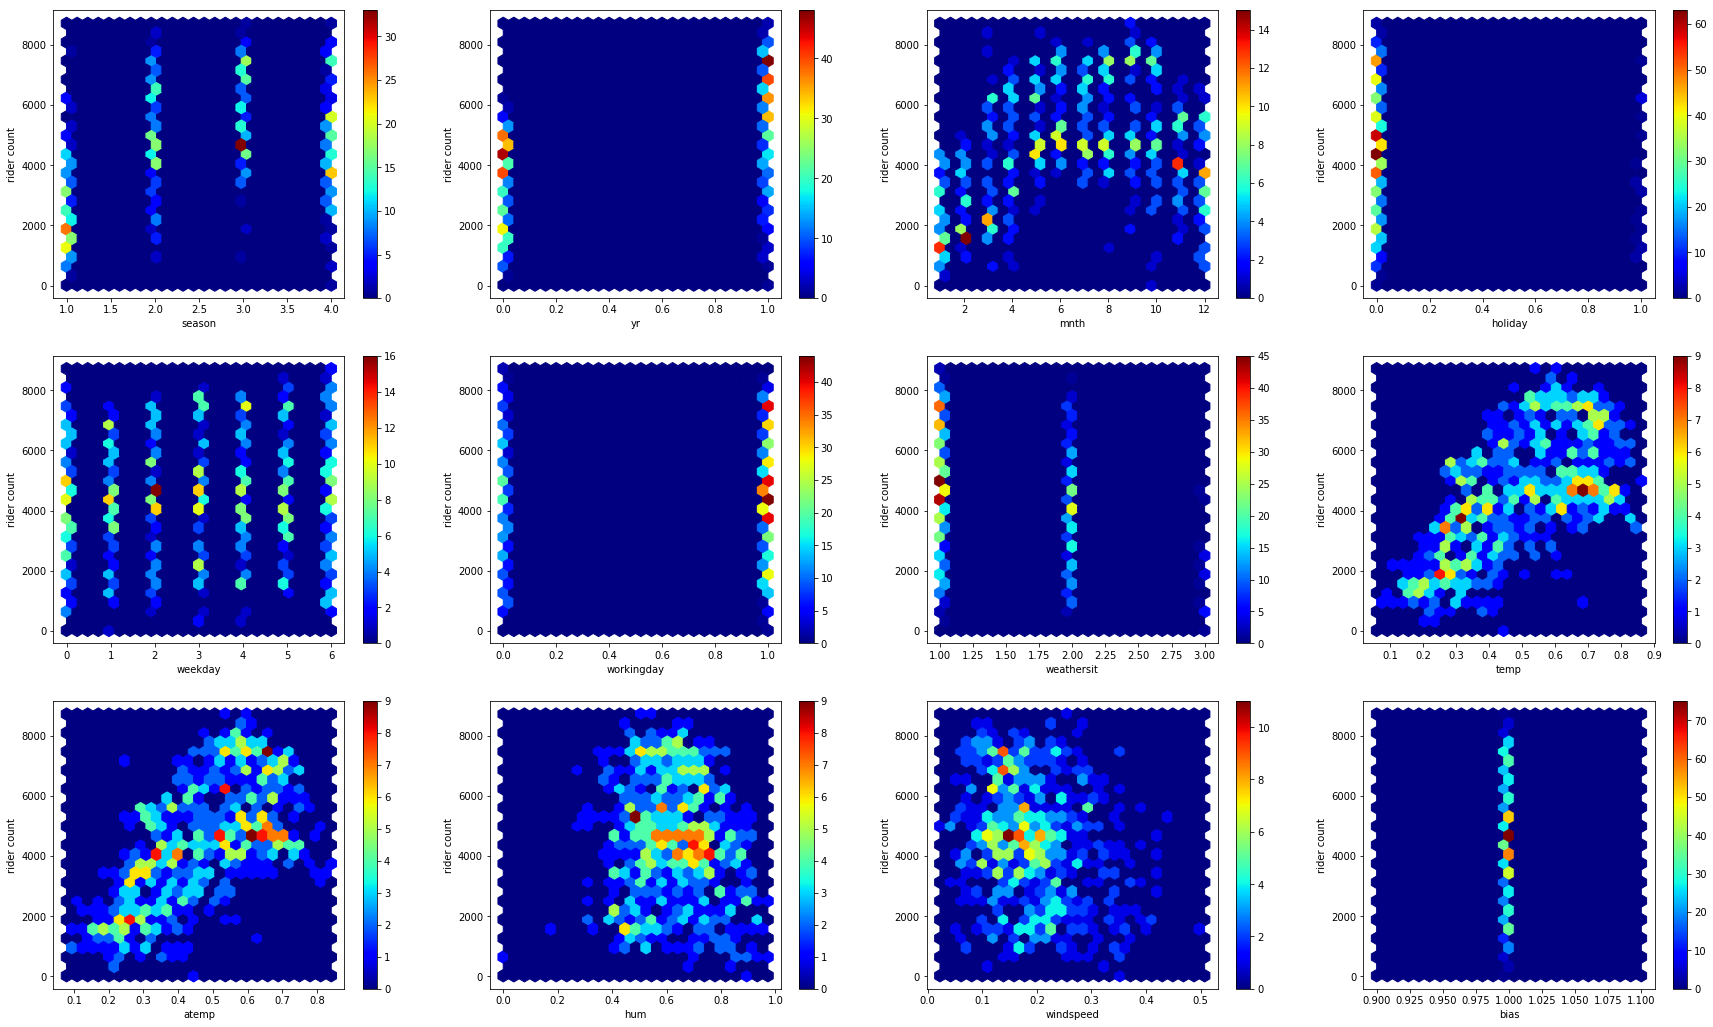

In [0]:
import pandas as pd
bikeshare = pd.read_csv('https://raw.githubusercontent.com/kylecho/nd101_p1_neural_network/master/Bike-Sharing-Dataset/day.csv')

X_bikeshare = bikeshare.drop(columns=['instant', 'dteday', 'cnt', 'registered', 'casual'])
y_bikeshare = bikeshare['cnt']
X_bikeshare['bias'] = 1

plt.figure(figsize=(30, 18))
for idx, col in enumerate(X_bikeshare):
    plt.subplot(3, 4, idx+1)
    plt.hexbin(X_bikeshare[col], y_bikeshare, gridsize=25, cmap='jet')
    plt.colorbar()
    plt.xlabel(col)
    plt.ylabel('rider count')

plt.subplots_adjust(wspace=.2)
plt.show()

### Training and Testing Sets

One of the most fundamental ideas in evaluating machine learning algorithm involves [partitioning data into a training set (used for fitting a model) and a testing set (used for estimating the performance of the model).  There is a pretty comprehensive article on [training, validation, and testing sets](https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets) on Wikipedia, but for now we are not going to be talking about the validation set.  Feel free to follow along with our presentation here and keep the link handy for future reference (no need to read the linked article now).

Remember the basic supervised learning problem setup where we are given a training data consisting of inputs $\mathbf{x_1}, \mathbf{x_2}, \ldots, \mathbf{x_n}$ and outputs $y_1, y_2, \ldots, y_n$.  So far we have been applying our learning algorithms to *all* $n$ of the training data instances.  We might be then tempted to estimate how well the resultant model would work on new data bytes computing the average squared error on these $n$ training instances.  It turns out that this approach can wildly overestimate how well the model will work on new data.  The reason is that the model parameters (e.g., the weights in linear regression) have been tuned to the training data.  Some of these model parameters will reflect genuine relationships between the inputs and outputs, and other model parameters may largely reflect particular quirks of the training data (e.g., noise) that are not applicable to new data.

In order to get an unbiased estimate of the performance of the model on new data we reserve a portion of the training data as a ***testing set***.  This testing set is not used to fit the model parameters and is only used to estimate model performance *after the model has been created*.

To clarify what we mean, in the next cell is some code that partitions the Bikeshare data into training and test sets.  We will fit the parameters of a linear regression model (using your code!) on the training set and calculate mean squared error on the testing set.  To make the code less cluttered, we will be using a helper function from the [`scikit-learn`](https://scikit-learn.org/stable/) library that creates a [training set / testing set split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split).  This function will ***randomly*** partition the given data into two disjoint sets: the training set and the testing set.  The parameter `test_size` controls the fraction of data assigned to the testing set versus the training set.  You'll also notice that we divide the `sum_of_squared_errors` by `y_train.shape[0]`, which is the number of training data instances.  Divided the sum of squared error by the number of training data instances gives us the *mean squared error.*  The mean squared error is more interpretable than the sum of squared errors since it controls for the number of data instances.

#### Notebook Exercise 4

Run the code below several times in order to answer the following questions.

<ol type="a">
<li>What causes the results to change from run to run?</li>

<li>As you run the code multiple times, does there seem to be a trend that the performance on the training set is better (i.e. has lower mean squared error) than the performance on the testing set?</li>

<li>Since the training set was used to fit the model parameters, we might expect the training set to always have better performance than the testing set.  It appears that this is not always the case.  How is this possible?</li>
</ol>

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_bikeshare, y_bikeshare, test_size=0.5)
w = optimal_weights(X_train, y_train)

print("training set mean squared error=%f" % (sum_of_squared_errors(X_train, y_train, w)/y_train.shape[0]))
print("testing set mean squared error=%f" % (sum_of_squared_errors(X_test, y_test, w)/y_test.shape[0]))

training set mean squared error=831323.600458
testing set mean squared error=686501.059788


##### Expand for Solution

***Solution***

<ol type="a">
<li>The changes in output are driven by randomness in the `train_test_split` function.  Depending on which instances are assigned to the training versus the testing set, the output will differ.</li>

<li>It does appear that, on average, the performance on the testing set is worse.</li>

<li>On any given run it does not follow that performance on the testing set will always be worse.  It could be the case that the testing set happened to contain a lot of easy to predict instances and the training set contained a high number of outliers.</li>
</ol>

### Ridge Regression

So far we've been working with this Bikeshare dataset in cases where we have a relatively high number of training instances compared with the dimensionality of the data.  To make this more precise, the shape of `X_train` is 365 by 12, which means we have ratio of roughly 30:1 training instances to inputs features.  While there are no hard and fast rules about this, a 30:1 ratio is considered pretty good for coming up with good esitmates of model parameters.

Suppose instead that we faced a situation where we had very little training data.  To simulate this case, below we rerun our experiment with the BikeShare dataset but set the `test_size` to 0.95.  You should notice two things when running this code.

1.  The performance on the training set is markedly better than the testing set.
2.  Occasionally you will get an error message about a singular matrix.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_bikeshare, y_bikeshare, test_size=0.95)
print("number of training points %d, number of testing points %d" % (y_train.shape[0], y_test.shape[0]))

w = optimal_weights(X_train, y_train)
print("training set mean squared error=%f" % (sum_of_squared_errors(X_train, y_train, w)/y_train.shape[0]))
print("testing set mean squared error=%f" % (sum_of_squared_errors(X_test, y_test, w)/y_test.shape[0]))

number of training points 36, number of testing points 695
training set mean squared error=439139.914045
testing set mean squared error=1518156.344032


The first observation (that the performance on the training set is markedly better than the testing set) is perhaps not very surprising since we now have much less training data to use to reliably estimate the model parameters.  To understand the second observation, we need remind ourselves of the formula for the optimal weights in linear regression.

$$\mathbf{w^\star} = \left ( \mathbf{X}^\top \mathbf{X} \right)^{-1} \mathbf{X}^\top \mathbf{y}$$

The error regarding a singular matrix is coming from the fact that we are computing the inverse of the matrix $\mathbf{X}^\top \mathbf{X}$.  One property of a [singular matrix](http://mathworld.wolfram.com/SingularMatrix.html) is that it is not invertible, hence the error message.  The reason it is not invertible is that the matrix $\mathbf{X}^\top \mathbf{X}$ is not full rank.  This happens when the training data does not properly span the space of the features.  This usually happens for a combination of the following reasons:

1.  There is too little training data
2.  There are features that are defined as linear combinations of each other.

In order to solve this problem, a common approach is to modify the linear regression problem to prefer solutions that have small weights.  We do this by penalizing the sum of the squares of the weights themselves.  This is called ridge regression (or Tikhonov regularization).  Below, we show the original version of ordinary least squares along with ridge regression.

Ordinary least squares:
$$\begin{align}
\mathbf{w^\star} &= \arg\min_\mathbf{w} \sum_{i=1}^n \left ( \mathbf{w}^\top \mathbf{x_i} - y_i \right)^2 \\
&= \arg\min_\mathbf{w} \left ( \mathbf{X}\mathbf{w} - \mathbf{y} \right)^\top \left ( \mathbf{X}\mathbf{w} - \mathbf{y} \right)
\end{align}$$

Ridge regression (note that $\lambda$ is a non-negative parameter that controls how much the algorithm cares about fitting the data and how much it cares about having small weights):
$$\begin{align}
\mathbf{w^\star} &= \arg\min_\mathbf{w} \sum_{i=1}^n \left ( \mathbf{w}^\top \mathbf{x_i} - y_i \right)^2 + \lambda\sum_{i=1}^d w_i^2 \\
&= \arg\min_\mathbf{w} \left ( \mathbf{X}\mathbf{w} - \mathbf{y} \right)^\top \left ( \mathbf{X}\mathbf{w} -  \mathbf{y} \right) + \lambda \mathbf{w}^\top \mathbf{w}
\end{align}$$

The penalty term may seem a little arbitrary, but it can be motivated on a conceptual level pretty easily.  The basic idea is that in the absence of sufficient training data to suggest otherwise, we should try to make the weights small.  Small weights have the property that changes to the input result in minor changes to our predictions, which is a good default behavior.

### Notebook Exercise 5
*Note: this one is really a math problem, but we didn't want to send you back to the other document and then back here again.  Let us know if you like this or not via NB.*

Derive an expression to compute the optimal weights, $\mathbf{w^\star}$, to the ridge regression problem.

* Hint 1: This is very, very similar to exercise 5 in the assignment document.
* Hint 2: If you follow the same steps as you did in exercise 5, you'll arrive at an expression that looks like this (note: $\mathbf{I}_{d \times d}$ is the $d$ by $d$ identity matrix).

$$\mathbf{w^\star} = \arg\min_\mathbf{w} \mathbf{w}^\top \mathbf{X}^\top \mathbf{X} \mathbf{w} - 2\mathbf{w}^\top \mathbf{X}^\top \mathbf{y} + \mathbf{y}^\top \mathbf{y} + \lambda \mathbf{w}^\top  \mathbf{I}_{d \times d} \mathbf{w}$$

* Hint 3: to get $\mathbf{w^\star}$, take the gradient, set it to 0 and solve for $\mathbf{w}$.

#### Expand for Solution

***Solution***

$$\begin{align}\mathbf{w^\star} &= \arg\min_\mathbf{w} \left ( \mathbf{X}\mathbf{w} - \mathbf{y} \right)^\top \left ( \mathbf{X}\mathbf{w} -  \mathbf{y} \right) + \lambda \mathbf{w}^\top \mathbf{w} \\
& = \arg\min_\mathbf{w} \mathbf{w}^\top \mathbf{X}^\top \mathbf{X} \mathbf{w} - 2\mathbf{w}^\top \mathbf{X}^\top \mathbf{y} + \mathbf{y}^\top \mathbf{y} + \lambda \mathbf{w}^\top  \mathbf{I}_{d \times d} \mathbf{w}\\
&= \arg\min_\mathbf{w} \mathbf{w}^\top \left ( \mathbf{X}^\top \mathbf{X} + \lambda \mathbf{I_{d \times d}} \right )\mathbf{w} - 2\mathbf{w}^\top \mathbf{X}^\top \mathbf{y} + \mathbf{y}^\top \mathbf{y} \\
2 \left (  \mathbf{X}^\top \mathbf{X} + \lambda \mathbf{I_{d \times d}} \right ) \mathbf{w^\star} - 2 \mathbf{X}^\top \mathbf{y} &=0 ~~\mbox{take the gradient and set to 0} \\
\mathbf{w}^\star &= \left ( \mathbf{X}^\top \mathbf{X} + \lambda \mathbf{I_{d \times d}} \right)^{-1} \mathbf{X}^\top \mathbf{y}
\end{align}$$

### Notebook Exercise 6

Now we'll be revisiting the Bikeshare dataset and see if ridge regression can help.  If you'd like to implement the algorithm yourself, feel free.  Since it is a relatively small change from the implementation that you created earlier, we have gone ahead and provided you with implementation below.  Here are some questions to test your understanding of the effects of applying ridge regression to the bike share dataset.

<ol type="a">
<li>Run the code below with the default setting of the input `lam`.  You should notice that singular matrix error does not arise anymore.  Make the value of `lam` really large (search over different orders of magnitude to find a value that is really large).  What happens to the training and test set errors?</li>

<li>Does there seem to be a value of `lam` that is best (we advise you to search over different orders of magnitude)?  How do you define best?  What would be a good process for determining a good value of `lam` (we'll be learning about this in much more detail coming up, but we wanted to get you thinking about some possibilities)?</li>
</ol>

In [0]:
def optimal_weights_ridge(X, y, lam):
     """ Returns the optimal weights in the least squares sense for the specified
         training inputs (X) and training outputs (y) with ridge term `lam` """
     return np.linalg.inv(X.T.dot(X) + lam*np.eye(X.shape[1])).dot(X.T).dot(y)
     
X_train, X_test, y_train, y_test = train_test_split(X_bikeshare, y_bikeshare, test_size=0.95)
print("number of training points %d, number of testing points %d" % (y_train.shape[0], y_test.shape[0]))

w = optimal_weights_ridge(X_train, y_train, 1)
print("training set mean squared error=%f" % (sum_of_squared_errors(X_train, y_train, w)/y_train.shape[0]))
print("testing set mean squared error=%f" % (sum_of_squared_errors(X_test, y_test, w)/y_test.shape[0]))

number of training points 36, number of testing points 695
training set mean squared error=608917.228853
testing set mean squared error=942739.384525


#### Expand for Solution

***Solution***

(a) When you make lambda really big, the errors become very large.  This is because the model is underfitting to the data.  In other words, it cares more about making the weights small than it does about fitting the data.

(b) It's pretty hard to tell, but it seems like a value around $0.0001$ seems to work pretty well.  We defined best by mentally averaging over the testing mean squared error measured across a few runs.  In order to do this more rigorously you'd want to have a defined space of values you'd search over, repeat the experiment a number of times, and then choose the best average performance.  We'll dig into this more systematically soon, but this is a good amount answer to get to with the current tools we have discussed.